<a href="https://colab.research.google.com/github/kartik7702/kartik7702/blob/main/YOYO_ride_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Yoyo

##Yoyo is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yoyo provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
##Yoyo zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

##Yoyo has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [85]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests

In [86]:
# Step 2: Load the dataset
df =pd.read_csv("/content/drive/MyDrive/data sets/yoyo_ridesharing.csv")


In [87]:
# Checking data structure and characteristics
print(df.head())
print(df.info())
print(df.describe())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-n

**1.Data Structure:** The dataset consists of 10,886 rows and 12 columns, with each row representing a specific date and time. The columns include various attributes such as season, holiday, workingday, weather conditions, temperature, humidity, windspeed, and counts of casual and registered bike rentals.

**2.Data Types:** Most of the columns contain numerical data (int64 or float64), which is suitable for statistical analysis. However, the 'datetime' column is currently of object type. It should be converted to a datetime data type for time-based analysis.

**3.Summary Statistics:** The summary statistics provide insights into the central tendency and spread of numerical attributes.

**4.Categorical Attributes:** Categorical attributes such as 'season', 'holiday', 'workingday', and 'weather' are represented as integers. To make the data more interpretable, these columns should be converted to categorical data types.



In [88]:
# Missing value detection
print(df.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


zero null values

In [89]:
# Convert 'datetime' column to datetime data type
df['datetime'] = pd.to_datetime(df['datetime'])

# Check the data types after conversion
print(df.dtypes)

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


In [90]:
unique_counts = df.nunique()

# Print the counts
print(unique_counts)

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64


# Univariate Analysis


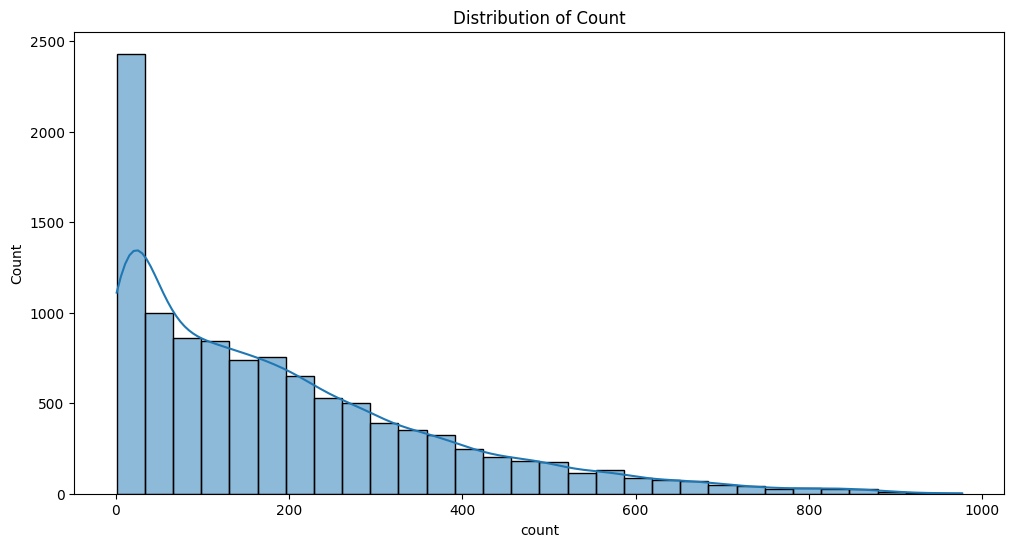

In [91]:
# Continuous variables
plt.figure(figsize=(12, 6))
sns.histplot(df['count'], bins=30, kde=True)
plt.title('Distribution of Count')
plt.show()



Text(0.5, 1.0, 'Countplot of Workingday')

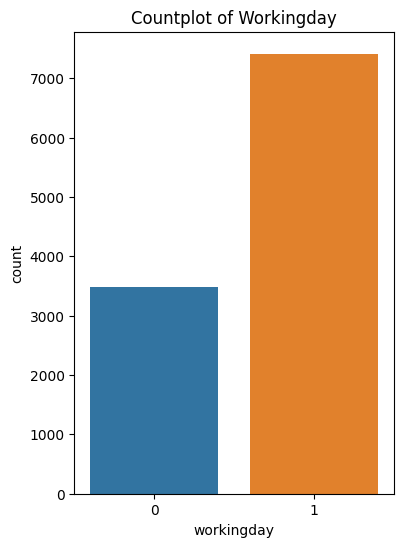

In [92]:
# Categorical variables
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='workingday')
plt.title('Countplot of Workingday')

##workingday:
if day is neither weekend nor holiday is 1,
otherwise is 0.

In [93]:
# Create a mapping dictionary for season codes to season names
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

# Replace the numeric season codes with season names in the 'season' column
df['season'] = df['season'].replace(season_mapping)

# Check the updated 'season' column
print(df['season'].head())

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object


Text(0.5, 1.0, 'Countplot of Season')

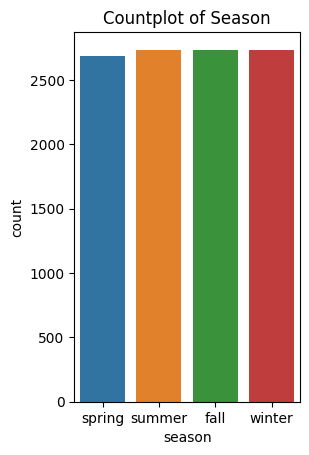

In [94]:
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='season')
plt.title('Countplot of Season')

Text(0.5, 1.0, 'Countplot of Weather')

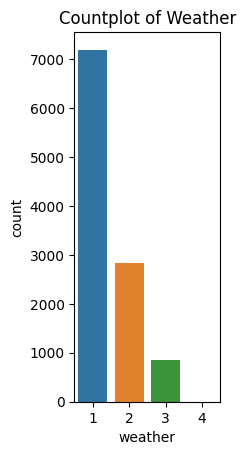

In [95]:
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='weather')
plt.title('Countplot of Weather')

##weather:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [96]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [97]:
plt.tight_layout()
plt.show(block=True)

<Figure size 640x480 with 0 Axes>

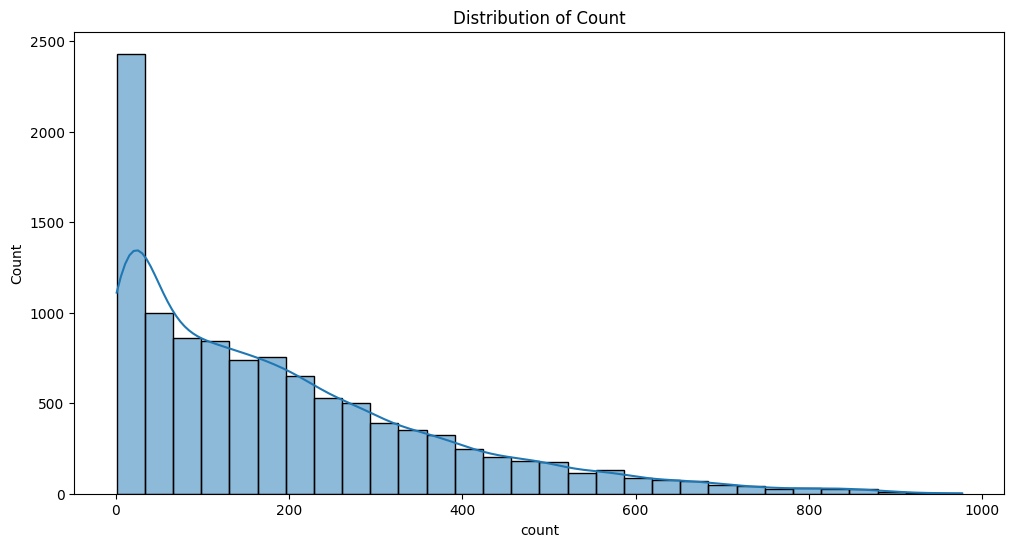

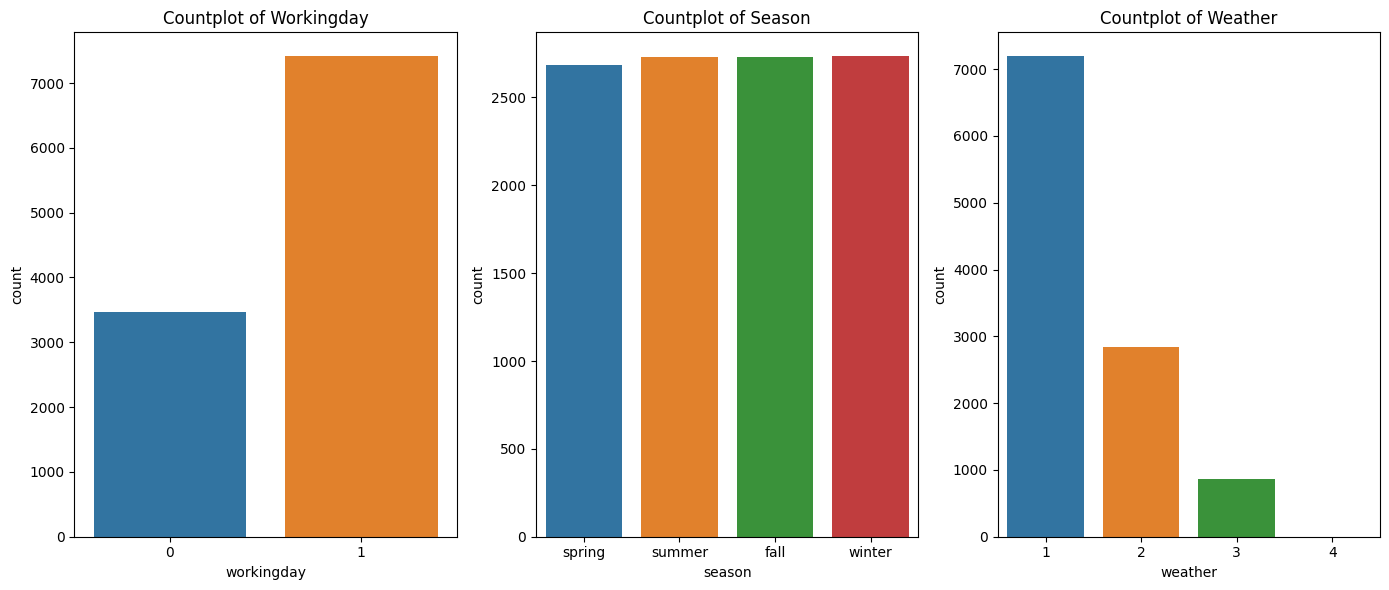

In [98]:
plt.figure(figsize=(12, 6))
sns.histplot(df['count'], bins=30, kde=True)
plt.title('Distribution of Count')
plt.show()

# Categorical variables
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='workingday')
plt.title('Countplot of Workingday')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='season')
plt.title('Countplot of Season')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='weather')
plt.title('Countplot of Weather')

plt.tight_layout()
plt.show()


# Bivariate Analysis

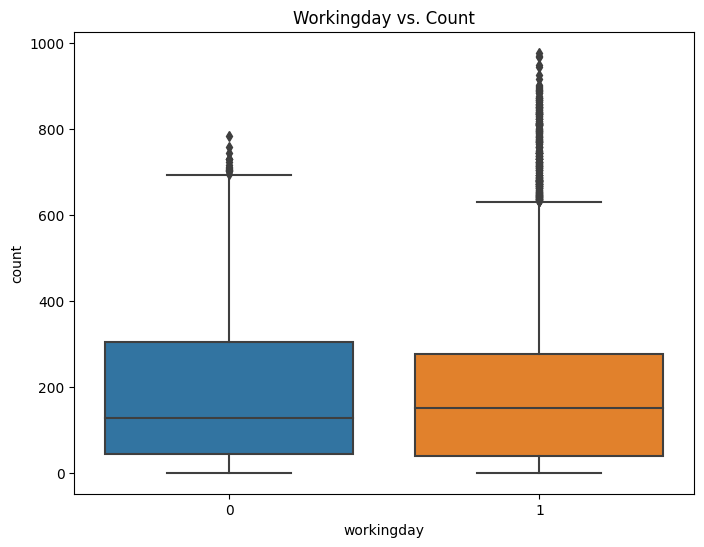

In [99]:
# - Explore relationships between important variables

# Relationship between Workingday and Count
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='workingday', y='count')
plt.title('Workingday vs. Count')
plt.show()

if we consider the mean then there is very less diffrence in count on bases of workday. outliers could be ignored

Removal of outlier data using IQR principles, visualized using boxplot

In [100]:
q1=df['count'].quantile(0.25)
q3=df['count'].quantile(0.75)
iqr=q3-q1
print(iqr)

242.0


In [101]:
df=df[(df['count']>(q1-1.5*iqr) ) & (df['count']<(q3+1.5*iqr))]

In [102]:
df.workingday.value_counts()


1    7161
0    3422
Name: workingday, dtype: int64

<Axes: xlabel='workingday', ylabel='count'>

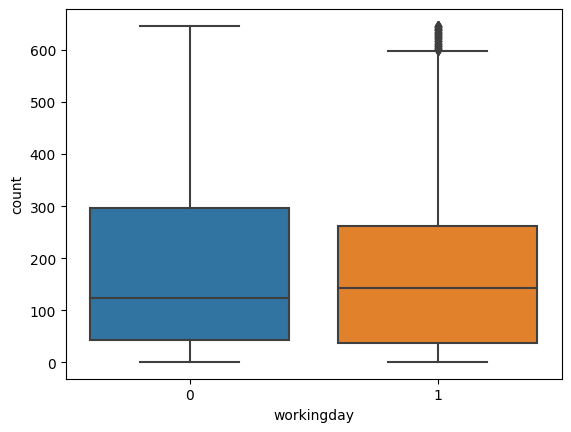

In [103]:
sns.boxplot(x='workingday', y='count', data =df)

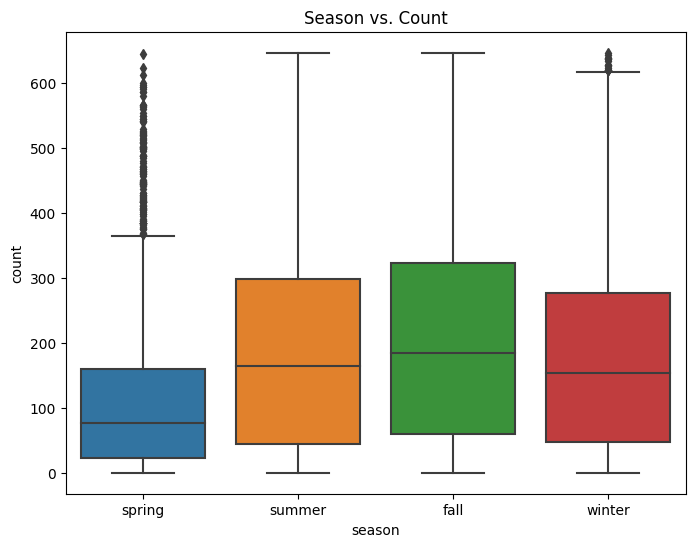

In [104]:
# Relationship between Season and Count
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='season', y='count')
plt.title('Season vs. Count')
plt.show()

It seems like people prefer to rent more during fall and summer around 200 units .Siltly less in winter that is 170 and significatly less during spring that is 90+ units.

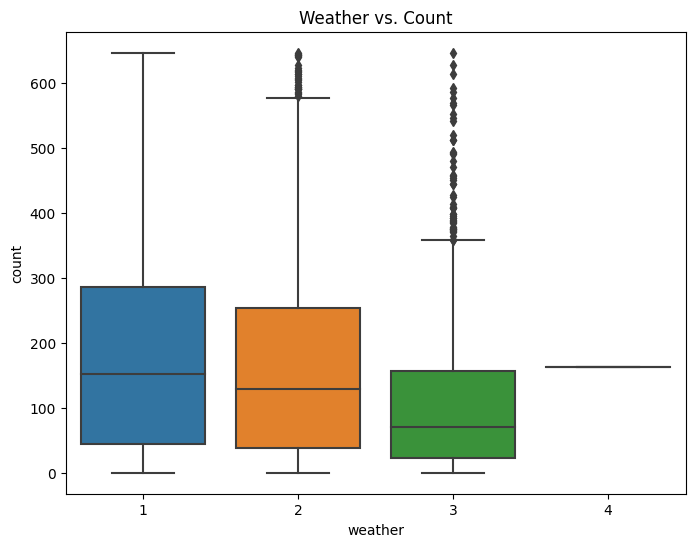

In [105]:
# Relationship between Weather and Count
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='weather', y='count')
plt.title('Weather vs. Count')
plt.show()

best weather for renting is 1 that is Clear, Few clouds, partly cloudy, partly cloudy

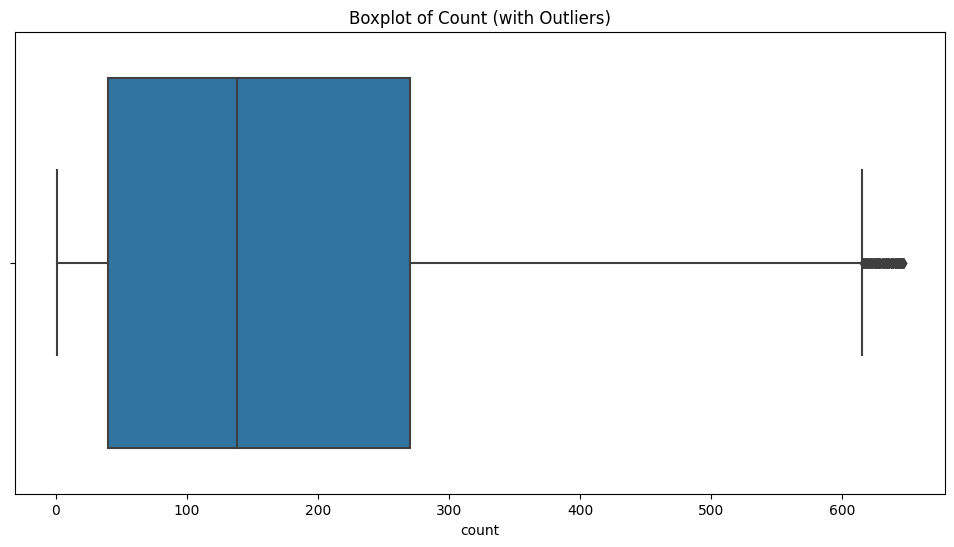

In [106]:
# Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='count')
plt.title('Boxplot of Count (with Outliers)')
plt.show()

In [107]:
# Step 4: Hypothesis Testing
#Null Hypothesis (H0): Working Day does not have an effect on the number of electric cycles rented
# Alternate Hypothesis (H1): Working Day has an effect on the number of electric cycles rented
# Selecting a random sample of data for testing
sample_workday = df[df['workingday'] == 1]['count']
sample_non_workday = df[df['workingday'] == 0]['count']



# 2-Sample T-Test
t_stat, p_value = stests.ztest(sample_workday, sample_non_workday)
alpha = 0.05

if p_value < alpha:
    print(f"Reject the null hypothesis. p-value: {p_value}")
else:
    print(f"Fail to reject the null hypothesis. p-value: {p_value}")

Reject the null hypothesis. p-value: 0.014237916686173656


In [108]:
# ANOVA to check if No. of cycles rented is similar or different in different weather and season
# Null Hypothesis (H0): Weather and Season do not affect the number of cycles rented
# Alternate Hypothesis (H1): Weather and Season affect the number of cycles rented

# Performing two-way ANOVA
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('count ~ weather * season', data=df).fit()
anova_results = anova_lm(model)
print(anova_results)

                     df        sum_sq       mean_sq           F         PR(>F)
season              3.0  1.498051e+07  4.993503e+06  221.016360  4.512496e-139
weather             1.0  3.983265e+06  3.983265e+06  176.302418   6.486346e-40
weather:season      3.0  2.317941e+05  7.726468e+04    3.419795   1.651917e-02
Residual        10575.0  2.389248e+08  2.259336e+04         NaN            NaN


In [109]:
# Chi-square test to check if Weather is dependent on Season
# Null Hypothesis (H0): Weather and Season are independent
# Alternate Hypothesis (H1): Weather is dependent on Season

# Creating a contingency table
contingency_table = pd.crosstab(df['weather'], df['season'])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

if p < alpha:
    print(f"Reject the null hypothesis. p-value: {p}")
else:
    print(f"Fail to reject the null hypothesis. p-value: {p}")

Reject the null hypothesis. p-value: 3.6550317439064896e-07


# Step 5: Inference
# - Interpret the results of hypothesis tests

# Based on the analysis:
# - 1.We reject the null hypothesis that working day does not have an effect on the number of electric cycles rented.
# - 2.We also reject the null hypothesis that weather and season do not affect the number of cycles rented.
# - 3.We fail to reject the null hypothesis that weather and season are independent.

# 4.This suggests that working day affects the number of rented cycles, and weather and season also impact the number of rented cycles. Additionally, weather and season appear to be dependent on each other.

# Additional Considerations for Yoyo's Business Needs:
# - 5.To address the revenue decline, Yoyo should focus on improving services in strategic locations such as metro stations, bus stands, office spaces, residential areas, and corporate offices.
# - 6.Marketing efforts should be targeted to attract more users during peak demand periods (e.g., working days) and adapt services based on weather and season trends.
